# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [6]:
# Resolver acá

import requests
import pandas as pd
import json

#Defino el url de la API que vamos a usar
buscar = "mermelada de frambuesa"
site_id = "MLA"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format(site_id, buscar.replace(" ", "%20"))
response = requests.get(url)

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [8]:
# Resolver acá
#Convierto la informacion de la API en un objeto de Python
mermeladas = response.json()

#Guardo los nombres de los items con los precios 
productos = [{"Nombre": item['title'], "Precio": item['price']} for item in mermeladas['results']]

#Armo un dataframe con la informacion de los items
df_merme = pd.DataFrame(productos)

print(df_merme)

                                               Nombre    Precio
0         St. Dalfour Mermelada Frambuesa Frasco 284g   7818.00
1   Mermelada Bonne Maman Sabor Frambuesa - Origen...  13697.00
2   Dulce Masseube Light De Frambuesa 260 Gr Sin Tacc   8845.00
3    Abedul Individuales Mermelada Frutilla 120 Un...   8530.00
4   Confitura Cuyen Frambuesa Orgánica S/tacc S/az...   7924.00
5                 Frambuesas Al Natural Masseube 380g  12132.91
6   Mermelada De Frambuesa Emeth Linea Gourmet Lig...   3804.75
7              Mermelada Frambuesa Masseube X 900 Grs  20734.56
8   Mermelada De Frambuesas Diet Trini Con Stevia ...   7153.50
9                    Pack X3 Mermeladas Masseube X45g   7853.81
10  Mermelada Frutos Del Bosque Artesanal 454g Aba...   5700.00
11  Dulce Artesanal De Frambuesa Abalauquen 454g -...   6600.00
12  Confitura De Frambuesa El Bolsón Sin Tacc X 45...   9760.00
13                  Mermelada Cuyen De Frambuesa 280g   8270.00
14  Dulce Frambuesa Abalauquen Hotelero 

In [10]:
#Me aseguro que los precios sea del tipo correcto para poder hacer las descriptivas
df_merme['Precio'] = df_merme['Precio'].astype(float)

#Calculo las descriptivas usando idx para despues poder tener informacion especifica del resultado
merme_promedio = df_merme['Precio'].mean()
merme_minimo = df_merme['Precio'].idxmin()  
merme_maximo = df_merme['Precio'].idxmax() 

#Aca busco dentro del dataframe cual es la mermelada mas barata para despues poder mencionarla con el nombre que le corresponde
mermebarata = df_merme.loc[merme_minimo, 'Nombre']
precio_mas_barato = df_merme.loc[merme_minimo, 'Precio']
mermecara = df_merme.loc[merme_maximo, 'Nombre']
precio_mas_caro = df_merme.loc[merme_maximo, 'Precio']

print(f'El precio promedio de las mermeladas de frambuesa en Mercado Libre es de {merme_promedio:.2f}.') #.2f para poder solo dos decimales
print(f'La mermelada más barata es: {mermebarata}, con un precio de {precio_mas_barato:.2f}.')
print(f'Por otro lado, la mermelada más cara es: {mermecara}, con un precio de {precio_mas_caro:.2f}.')

El precio promedio de las mermeladas de frambuesa en Mercado Libre es de 18935.01.
La mermelada más barata es: Mermelada De Frambuesa Emeth Linea Gourmet Light 390grs, con un precio de 3804.75.
Por otro lado, la mermelada más cara es: Mermelada De Frambuesa 5 Kg Bag In Box El Bolsón, con un precio de 98880.00.


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

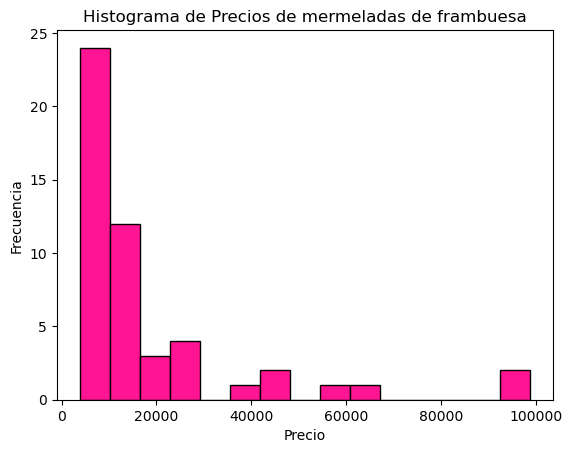

Si, hay outliers. Por ejemplo, observando en el histograma y teniendo en cuenta el precio maximo, podriamos decir que Mermelada De Frambuesa 5 Kg Bag In Box El Bolsón con un precio  98880.0 es un outlier.


In [22]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt

#Armo el histograma usando 15 para los bins para identificar mejor los outliers. Usando rosa para que combine con las mermeladas. 
df_merme['Precio'].plot(kind='hist', bins=15, edgecolor='black', color='deeppink')

plt.title('Histograma de Precios de mermeladas de frambuesa')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

print("Si, hay outliers. Por ejemplo, observando en el histograma y teniendo en cuenta el precio maximo, podriamos decir que", mermecara, "con un precio ", precio_mas_caro, "es un outlier.")

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [24]:
#Aca averigupo cual es el id de cada categoria en Mercado Libre Argentina
site_id = "MLA"  
url = f"https://api.mercadolibre.com/sites/{site_id}/categories"

response = requests.get(url)
categories = response.json()

for category in categories:
    print(f" {category['id']}, {category['name']}")

 MLA5725, Accesorios para Vehículos
 MLA1512, Agro
 MLA1403, Alimentos y Bebidas
 MLA1071, Animales y Mascotas
 MLA1367, Antigüedades y Colecciones
 MLA1368, Arte, Librería y Mercería
 MLA1743, Autos, Motos y Otros
 MLA1384, Bebés
 MLA1246, Belleza y Cuidado Personal
 MLA1039, Cámaras y Accesorios
 MLA1051, Celulares y Teléfonos
 MLA1648, Computación
 MLA1144, Consolas y Videojuegos
 MLA1500, Construcción
 MLA1276, Deportes y Fitness
 MLA5726, Electrodomésticos y Aires Ac.
 MLA1000, Electrónica, Audio y Video
 MLA2547, Entradas para Eventos
 MLA407134, Herramientas
 MLA1574, Hogar, Muebles y Jardín
 MLA1499, Industrias y Oficinas
 MLA1459, Inmuebles
 MLA1182, Instrumentos Musicales
 MLA3937, Joyas y Relojes
 MLA1132, Juegos y Juguetes
 MLA3025, Libros, Revistas y Comics
 MLA1168, Música, Películas y Series
 MLA1430, Ropa y Accesorios
 MLA409431, Salud y Equipamiento Médico
 MLA1540, Servicios
 MLA9304, Souvenirs, Cotillón y Fiestas
 MLA1953, Otras categorías


In [26]:
#Una vez que encontre el id de la categoria que buscaba genero el url de la api

buscar = "libros físicos"
site_id = "MLA"  

#Mirando lo de arriba completo que la categoria es MLA3025
url = f"https://api.mercadolibre.com/sites/{site_id}/search?q={buscar.replace(' ', '%20')}&category= MLA3025"  
response = requests.get(url)
datos = response.json()

In [28]:
# Saco los valores de datos y me aseguro que los guarde en una lista que si no tiene resultados este vacia
productos = datos.get('results', [])

# Verifico si productos es una lista que tiene  elementos.     
# #Armo el diccionario para que guarde los datos que necesito de cada libro y me aseguro que si no hay informacion lo deje vacio

if isinstance(productos, list) and productos:
    libros = [{
            "Nombre": item.get('title', 'No disponible'),
            "Precio Actual": item.get('price', None),
            "Precio Original": item.get('original_price', None)
        } for item in productos]
else:
    libros = []

df_libros = pd.DataFrame(libros)
print(df_libros)
print("Habiendo mirado lo que ofrecia la API, decidi agregar los precios actuales y una columna con precios originales para los libros que tenian una variacion.")

                                               Nombre  Precio Actual  \
0        Libro La Felicidad - Gabriel Rolón - Planeta       26500.00   
1   El Libro De Bill De Alex Hirsch Editorial Planeta       38400.00   
2   Este Dolor No Es Mío De Mark Wolynn Gaia Edici...       26910.00   
3       Hábitos Atómicos James Clear Editorial Booket       21100.00   
4   Romper El Círculo, De Colleen Hoover. Editoria...       29000.00   
5   La Vez Que Casi Me Muero Y Otros Relatos - Ger...       15900.00   
6               Gravity Falls Diario 3 Planeta Junior       39000.00   
7   Keri Smith Destroza Este Diario A Todo Color E...       26384.00   
8   El Hombre Que Daba Charla A Los Call Center - ...       15900.00   
9             Libro El Duelo - Gabriel Rolón - Booket       18900.00   
10  Libro  Facilitación Optimista  - Cynthia Rubin...       62500.00   
11  Deja De Ser Tú, De Joe Dispenza. Editorial Ura...       36984.00   
12  Libro Volver A Empezar - Hoover Colleen - Planeta       3270

In [30]:
#Para que no tenga errores al calcular hago que todos los valores sean numericos y sepa quqe hacer cuando no lo son
df_libros['Precio Actual'] = pd.to_numeric(df_libros['Precio Actual'], errors='coerce')

#Calculo la media y le pido que me de solo dos decimales
media_precio = df_libros['Precio Actual'].mean()
print(f"La media de los precios es: {media_precio:.2f}")

#Calculo los minimos y maximos 
libro_min = df_libros['Precio Actual'].idxmin()  
libro_max = df_libros['Precio Actual'].idxmax() 

librobarato = df_libros.loc[libro_min, 'Nombre']
precio_libro_barato = df_libros.loc[libro_min, 'Precio Actual']
librocaro = df_libros.loc[libro_max, 'Nombre']
precio_libro_caro = df_libros.loc[libro_max, 'Precio Actual']

print(f'El libro más barato es: {librobarato}, con un precio de {precio_libro_barato:.2f}.')
print(f'Por otro lado, el libro más caro es: {librocaro}, con un precio de {precio_libro_caro:.2f}.')

rango_precio = precio_libro_caro - precio_libro_barato
print(f'El rango entre el precio mas alto y el precio mas bajo es de: {rango_precio:.2f}')

La media de los precios es: 32382.83
El libro más barato es: El Principito De Saint-exupery Antoi Editorial Catapulta, con un precio de 7790.00.
Por otro lado, el libro más caro es: Harry Potter, De J K Rowling. Editorial Salamandra, Tapa Blanda En Español, 2021, con un precio de 136895.00.
El rango entre el precio mas alto y el precio mas bajo es de: 129105.00


In [32]:
print('El siguiente dataframe muestra cuales son los libros que tienen una diferencia positiva entre el precio actual y original. Esta ordenado de manera descendente.')
# Calculo la diferencia entre el precio original y el actual
df_libros['Diferencia'] = df_libros['Precio Original'] - df_libros['Precio Actual']

# Filtro los libros que tienen una diferencia positiva entre el actual y original
libros_con_diferencia = df_libros[df_libros['Diferencia'] > 0]
#Le pido que ordene los datos de mayor a menos
libros_con_diferencia_ordenado = libros_con_diferencia.sort_values(by='Diferencia', ascending=False)

# Armo un dataframe con los libros que consegui 
print(libros_con_diferencia_ordenado[['Nombre', 'Diferencia']])

El siguiente dataframe muestra cuales son los libros que tienen una diferencia positiva entre el precio actual y original. Esta ordenado de manera descendente.
                                               Nombre  Diferencia
18  Harry Potter, De J K Rowling. Editorial Salama...     11904.0
21  Las 48 Leyes Del Poder, De Greene, Robert. Edi...      3490.0
28             Las 48 Leyes Del Poder - Robert Greene      3490.0
17  Una Familia Anormal ( Pack ): Estuche Relanzam...      3433.0
11  Deja De Ser Tú, De Joe Dispenza. Editorial Ura...      3216.0
25  El Poder De Las Palabras, De Sigman, Mariano. ...      2834.0
39  Poder Del Ahora, El, De Tolle, Eckhart., Vol. ...      1432.0
44  Libro Coraline - Neil Gaiman, De Gaiman, Neil....      1240.0
42  Basta De Amores De Mierda, De  El Pela  Gonzal...      1120.0


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
import requests #html requestor
from bs4 import BeautifulSoup #html parser
import pandas as pd #dataframe manipulator

In [ ]:
url = "https://www.lanacion.com.ar"

r = requests.get(url) # traigo el htlm con "request"
contenido = r.content # y me quedo con el contenido con "content"

soup = BeautifulSoup(contenido, "html.parser") # lo pongo en formato  texto
print(soup)

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-presidente-luiz-inacio-lula-da-silva-en-el-AZIL2DWXTVEQTLEWP2VHM7TIHY.JPG?auth=3cc4d8bdc2f3a58fbe0fb7c674d574f3bd095a96440354737208e0db5edfec17&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/el-presidente-luiz-inacio-lula-da-silva-en-el-AZIL2DWXTVEQTLEWP2VHM7TIHY.JPG?auth=3cc4d8bdc2f3a58fbe0fb7c674d574f3bd095a96440354737208e0db5edfec17&amp;width=302&amp;height=201&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><style id="critical-fonts">
@font-face {

In [ ]:
links = [] # armo lista vacia para llenar con los links en el loop 
for link in soup.find_all("a", href = True): # la "a" se usa para definir hipervínculos. Permite hacer clic para navegar a otras páginas web o recursos. El atributo href dentro del "a" contiene la URL a la que el enlace apunta
    href = link.get("href") # accedo a valores que contienen "href"
    full_url = href if href.startswith("http") else url + href # hago variable de link completo, donde si empieza con "http" lo dejo como esta, sino le agrego el url al href
    links.append(full_url) # agrego los links completos a la lista de links

print(links)
# llama a todos los links de la pagina principal de "La Nacion", no solo a las noticias.

['https://www.lanacion.com.ar/clima/', 'https://club.lanacion.com.ar/', 'https://lnmas.lanacion.com.ar/', 'https://foodit.lanacion.com.ar/', 'https://canchallena.lanacion.com.ar/', 'https://bonvivir.com/', 'https://www.lanacion.com.ar/', 'https://www.lanacion.com.ar/dolar-hoy/', 'https://www.lanacion.com.ar/tema/dolar-blue-tid67294/', 'https://www.lanacion.com.ar/tema/dolar-turista-tid67475/', 'https://www.lanacion.com.ar/tema/dolar-ccl/', 'https://www.lanacion.com.ar/tema/dolar-mep/', 'https://www.lanacion.com.ar/juegos/', 'https://www.lanacion.com.ar/suscriptores/', 'https://newsletter.lanacion.com.ar/?_ga=2.115587013.2111665650.1713785519-1414281100.1711030569', 'https://www.lanacion.com.ar/', 'https://www.lanacion.com.ar#', 'https://foodit.lanacion.com.ar/', 'https://club.lanacion.com.ar/', 'https://myaccount.lanacion.com.ar/mi-usuario/', 'https://www.lanacion.com.ar/ultimas-noticias/', 'https://www.lanacion.com.ar/transito/', 'https://www.lanacion.com.ar/clima/', 'https://www.lana

In [ ]:
# hago un dataframe con los links
links_la_nacion = pd.DataFrame(links, columns=["URL"])

# exporto el dataframe a un Excel
links_la_nacion.to_excel("portada_lanacion.xlsx", index = False)